In [4]:
# get the data using the kaggle library
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [6]:
path = 'datasets/salaryd'
file = 'Salary.zip'

In [13]:
# extract zipped data file
def extract_data(path=path):
    full_path = os.path.join(path, file)
    file_zip = zipfile.ZipFile(full_path)
    file_zip.extractall(path)
    file_zip.close()

In [15]:
extract_data() # Done!

In [16]:
# load our data.
def load_data(path=path):
    df = pd.read_csv(os.path.join(path, 'Salary.csv'))
    return df

In [20]:
df = load_data() # Done!

In [21]:
# Let's investigate the dataframe.
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


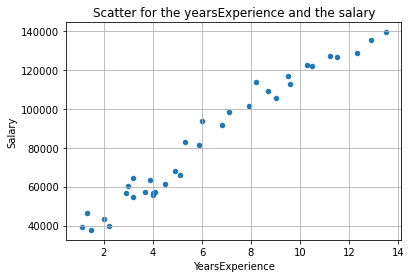

In [27]:
# let's see the correlation between the years of experience and the salary by using the scatter plot
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.title('Scatter for the yearsExperience and the salary')
plt.grid()
plt.show()
# it's obvious that there's a highly(strong) positive relationship between the two attributes
# so a simple linear regression model will be suffiecient and will be perfect fit as well.

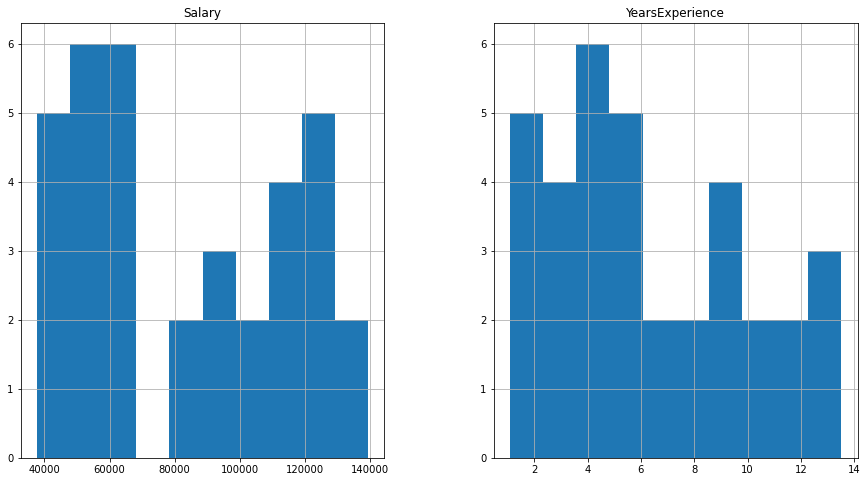

In [32]:
df.hist(figsize=(15, 8))
plt.show()

In [34]:
df[['YearsExperience', 'Salary']].groupby(['YearsExperience']).mean()

,Salary
YearsExperience,
1.1,39343.0
1.3,46205.0
1.5,37731.0
2.0,43525.0
2.2,39891.0
2.9,56642.0
3.0,60150.0
3.2,59445.0
3.7,57189.0


We want to descretize(convert into categorical attribute) the YearsExperience so as to help us split our dataset into train and test such that we include all possible strats of the yearsExperience

### Those are the whole values of the YearExperience attribute that must be well-represented in the training and testing datasets with their same distribution for best results after the splitting

In [50]:
df.YearsExperience.value_counts()/df.shape[0]

4.0     0.057143
3.2     0.057143
12.3    0.028571
1.1     0.028571
2.0     0.028571
3.0     0.028571
4.5     0.028571
6.0     0.028571
9.0     0.028571
9.5     0.028571
10.5    0.028571
11.5    0.028571
13.5    0.028571
12.9    0.028571
7.9     0.028571
4.1     0.028571
5.1     0.028571
9.6     0.028571
7.1     0.028571
4.9     0.028571
8.2     0.028571
8.7     0.028571
11.2    0.028571
3.7     0.028571
2.9     0.028571
1.3     0.028571
10.3    0.028571
3.9     0.028571
2.2     0.028571
5.3     0.028571
5.9     0.028571
6.8     0.028571
1.5     0.028571
Name: YearsExperience, dtype: float64

In [42]:
years_exp_catego = pd.cut(df.YearsExperience, bins=[0, 2, 4, 6, 8, 10, 12, 14], labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th'])

In [44]:
df['Years_cat'] = years_exp_catego

### We could identify each category of years of experience in the dataset represents what portion of the whole dataset size.

In [51]:
df.Years_cat.value_counts()/df.shape[0]

2nd    0.257143
3rd    0.200000
5th    0.142857
6th    0.114286
1st    0.114286
7th    0.085714
4th    0.085714
Name: Years_cat, dtype: float64

### we could categorize our YearsExperience attribute to be sure that we have all possible strats of that important attribute.

In [46]:
df.head()

,YearsExperience,Salary,Years_cat
0,1.1,39343,1st
1,1.3,46205,1st
2,1.5,37731,1st
3,2.0,43525,1st
4,2.2,39891,2nd


In [76]:
# let's split our dataset into train and testing.
from sklearn.model_selection import StratifiedShuffleSplit

strats_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in strats_obj.split(df, df.Years_cat):
    X_train, X_test = df.loc[train_idx], df.loc[test_idx]

In [77]:
X_train.shape, X_test.shape # Done!

((24, 3), (11, 3))

### We could split out dataset successfully with keeping the same portions for each strata in the dataset

In [78]:
X_train.Years_cat.value_counts()/X_train.shape[0]

2nd    0.250000
3rd    0.208333
6th    0.125000
5th    0.125000
1st    0.125000
7th    0.083333
4th    0.083333
Name: Years_cat, dtype: float64

In [79]:
X_test.Years_cat.value_counts()/X_test.shape[0]

2nd    0.272727
5th    0.181818
3rd    0.181818
7th    0.090909
6th    0.090909
4th    0.090909
1st    0.090909
Name: Years_cat, dtype: float64

In [80]:
y_train = X_train.Salary.copy()
y_test = X_test.Salary.copy()
X_train_ = X_train.drop(['Salary', 'Years_cat'], axis=1)
X_test_ = X_test.drop(['Salary', 'Years_cat'], axis=1)

In [81]:
# let's train our linear regression model
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

### Our linear regression model is now trained, 
it's the time to evaluate it's performance on the training dataset.

In [82]:
model_LR.fit(X_train_, y_train)

LinearRegression()

In [83]:
train_pred = model_LR.predict(X_train_)

In [84]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_train, train_pred)
print('Avg. model error on the training data: %f'%np.sqrt(score))

Avg. model error on the training data: 5647.509186


In [102]:
### to check the model performance effieicintly, we will perform the cross-validation test.
from sklearn.model_selection import cross_val_score

val_pred = cross_val_score(model_LR, X_train_, y_train, cv=10, scoring='neg_mean_squared_error')
# print('Avg. error for 10 training rounds: %f'% np.sqrt(-val_pred))
np.sqrt(-val_pred).mean() # mean error of 10 training rounds

5714.704439087285

In [137]:
np.sqrt(-val_pred).std() # standard deviation of the error for 10 training rounds

2705.7549447747715

In [129]:
y_pred = model_LR.predict(X_train_)

### This is the linear regression model output on the dataset

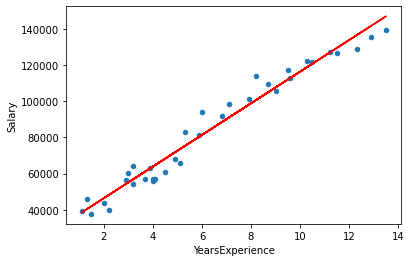

In [130]:
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(X_train_.YearsExperience, y_pred, 'b-', color='red')
plt.show()

### Let's see the model performance on test set

In [131]:
y_test_pred = model_LR.predict(X_test_)

In [135]:
score_test = mean_squared_error(y_test, y_test_pred)
print('Avg Error on the testing dataset: %f'%np.sqrt(score_test).mean())

Avg Error on the testing dataset: 6467.335621


### Let's compute the 95% confidence interval for the average error to evaluate our linear regression model performance

conf. interval = mean error +|- z(Sigma/sqrt(n)) or mean error +|-t(std/sqrt(n))

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [149]:
from scipy import stats
confidence = 0.95
sq_errors = (y_test_pred-y_test)**2
np.sqrt(stats.t.interval(confidence, sq_errors.shape[0]-1, loc=sq_errors.mean(), scale=stats.sem(sq_errors)))

array([5194.17331482, 7528.17531993])

### This is the model fit on the testing dataset

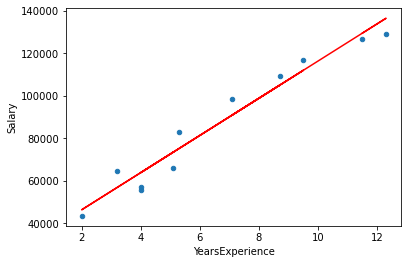

In [156]:
X_test.plot(kind='scatter', x='YearsExperience',y='Salary')
plt.plot(X_test_.YearsExperience, y_test_pred, color='r')

#### so our final mean error for our model is within the 95% confidence interval

In [176]:
model_LR.predict([[5]])

array([72606.64283592])